In [138]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor

In [139]:
data = pd.read_csv('parkinsons_updrs.data')


ATTRIBUTE INFORMATION:

**subject#** - Integer that uniquely identifies each subject \
**age** - Subject age \
**sex** - Subject gender '0' - male, '1' - female \
**test_time** - Time since recruitment into the trial. The integer part is the 
number of days since recruitment. \
**motor_UPDRS** - Clinician's motor UPDRS score, linearly interpolated \
**total_UPDRS** - Clinician's total UPDRS score, linearly interpolated \
**Jitter(%),Jitter(Abs),Jitter**:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency \
**Shimmer,Shimmer(dB),Shimmer**:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - 
Several measures of variation in amplitude \
**NHR,HNR** - Two measures of ratio of noise to tonal components in the voice \
**RPDE** - A nonlinear dynamical complexity measure \
**DFA** - Signal fractal scaling exponent \
PPE - A nonlinear measure of fundamental frequency variation \

In [140]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [141]:
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [142]:
data = data[data.test_time >= 0 ]

In [143]:
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,21.460345,64.814771,0.318438,93.061538,21.289655,29.014090,0.006156,0.000044,0.002988,0.003278,0.008965,0.034038,0.311012,0.017157,0.020149,0.027489,0.051470,0.032126,21.679527,0.541423,0.653252,0.219618
std,12.361029,8.827750,0.465910,53.320896,8.133419,10.709966,0.005628,0.000036,0.003126,0.003734,0.009378,0.025836,0.230310,0.013237,0.016672,0.020002,0.039710,0.059735,4.292521,0.101024,0.070955,0.091494
min,1.000000,36.000000,0.000000,0.395830,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,47.335500,15.000000,21.362000,0.003580,0.000022,0.001580,0.001825,0.004730,0.019110,0.175000,0.009280,0.010790,0.015660,0.027830,0.010953,19.404000,0.469695,0.596100,0.156385
50%,22.000000,65.000000,0.000000,91.754000,20.871000,27.522000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027530,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.917000,0.542250,0.643550,0.205560
75%,33.000000,72.000000,1.000000,138.460000,27.594000,36.400500,0.006800,0.000053,0.003290,0.003470,0.009880,0.039775,0.365000,0.020605,0.023775,0.032725,0.061805,0.031464,24.445500,0.614045,0.711480,0.264590
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [144]:
#Making sure all data is numerical 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5863 non-null   int64  
 1   age            5863 non-null   int64  
 2   sex            5863 non-null   int64  
 3   test_time      5863 non-null   float64
 4   motor_UPDRS    5863 non-null   float64
 5   total_UPDRS    5863 non-null   float64
 6   Jitter(%)      5863 non-null   float64
 7   Jitter(Abs)    5863 non-null   float64
 8   Jitter:RAP     5863 non-null   float64
 9   Jitter:PPQ5    5863 non-null   float64
 10  Jitter:DDP     5863 non-null   float64
 11  Shimmer        5863 non-null   float64
 12  Shimmer(dB)    5863 non-null   float64
 13  Shimmer:APQ3   5863 non-null   float64
 14  Shimmer:APQ5   5863 non-null   float64
 15  Shimmer:APQ11  5863 non-null   float64
 16  Shimmer:DDA    5863 non-null   float64
 17  NHR            5863 non-null   float64
 18  HNR     

In [145]:
print('Data Shape', data.shape)
print('Duplicate rows:', data.duplicated().sum())
print('NaN values in the DataFrame:', data.isnull().sum().sum())

Data Shape (5863, 22)
Duplicate rows: 0
NaN values in the DataFrame: 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


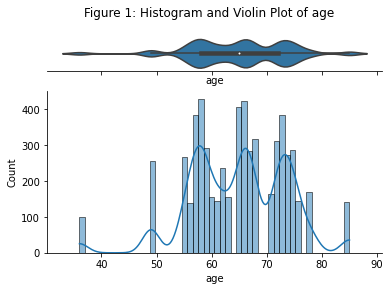

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


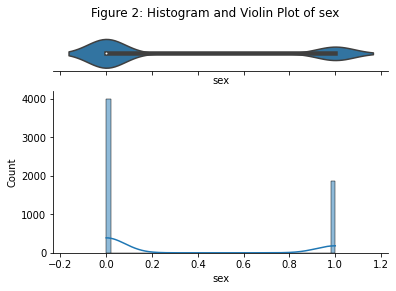

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


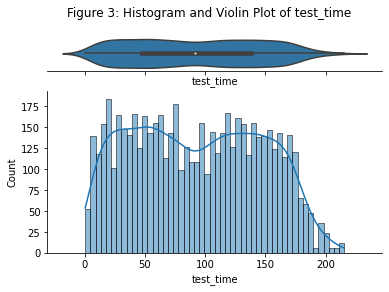

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


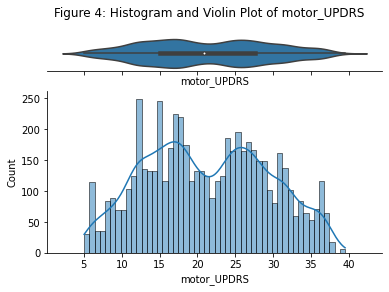

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


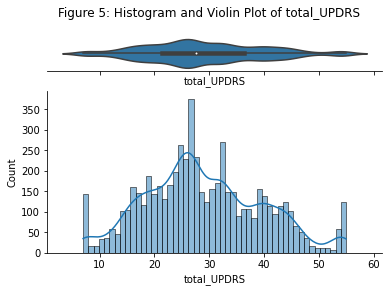

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


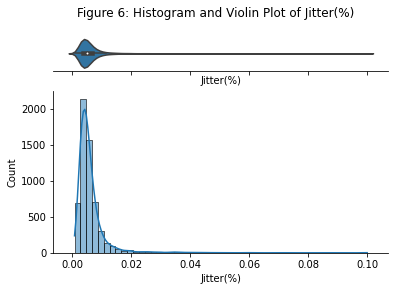

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


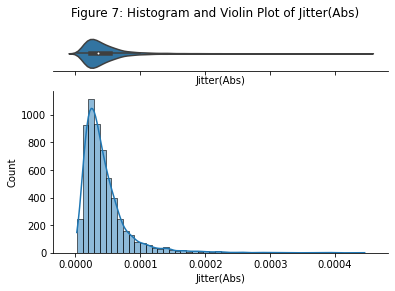

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


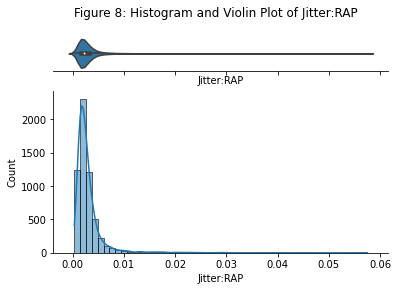

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


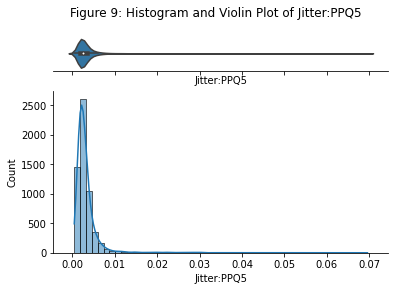

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


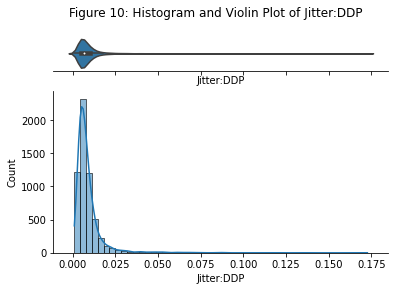

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


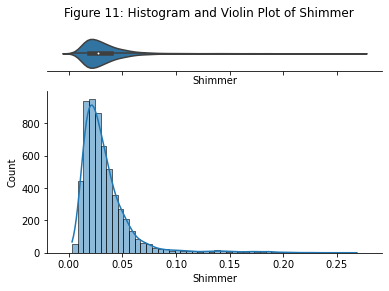

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


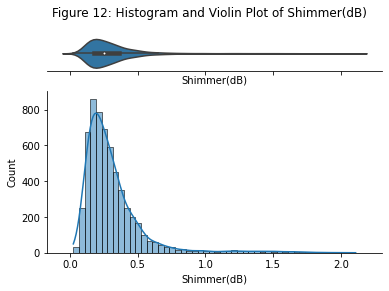

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


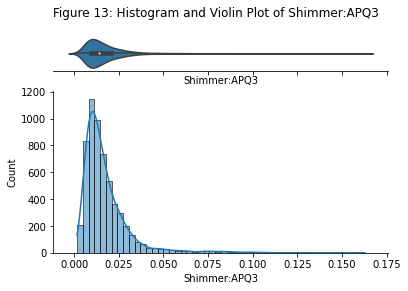

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


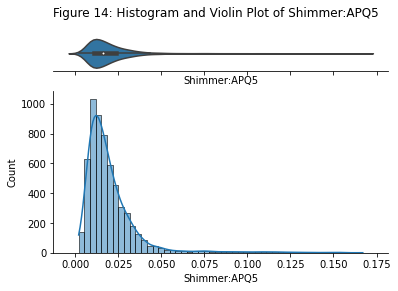

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


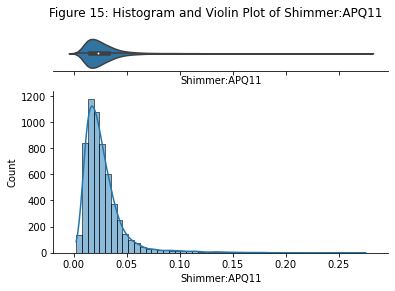

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


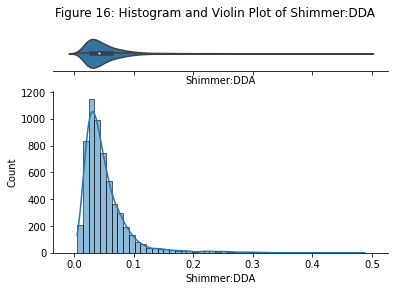

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


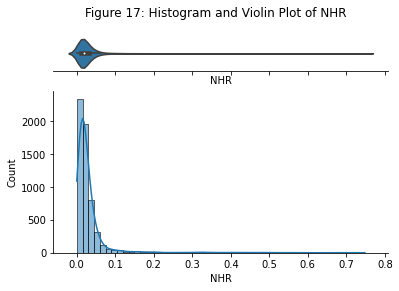

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


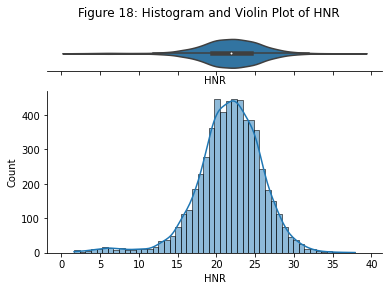

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


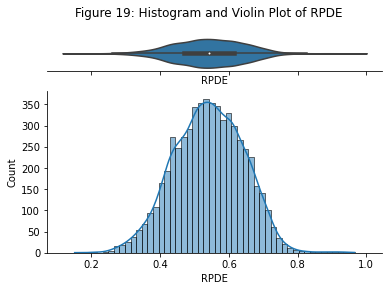

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


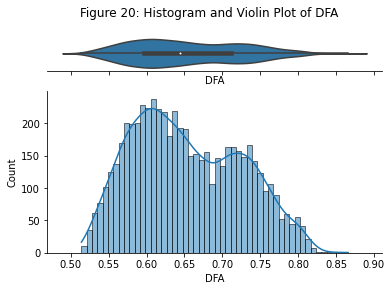

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


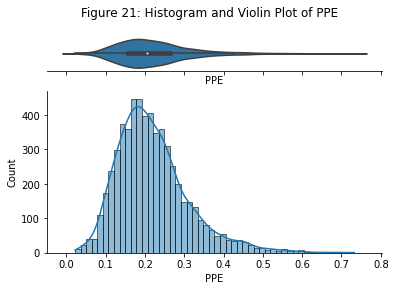

In [146]:
df = data.copy()

def BarPlot(x):
    total = float(len(df)) 
    ax = df[x].value_counts(normalize = True).plot(
        kind = "bar", alpha = 0.5)

def BoxHistogramPlot(x):
    figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.2, .9)})
    plt.suptitle("Figure " + str(i) + ": Histogram and Violin Plot of " + col,size=12)
    sns.violinplot(x, ax=ax_box)
    sns.histplot(x, ax=ax_hist, bins = 50, kde = True)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

i= 1   
for col in list(data.columns[1:]):
    BoxHistogramPlot(df[col])
    plt.show()
    i = 1 + i

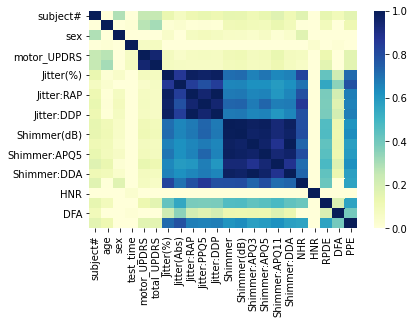

In [147]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, vmin=0, vmax=1, cmap="YlGnBu")

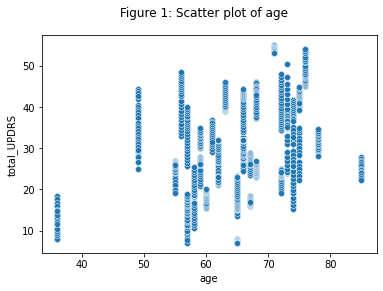

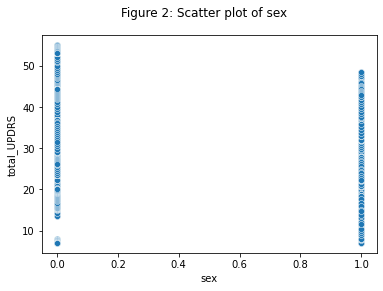

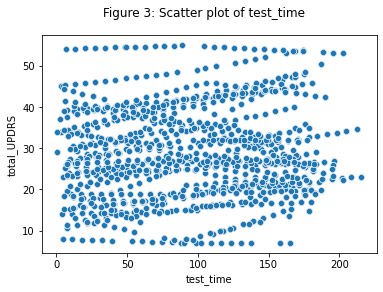

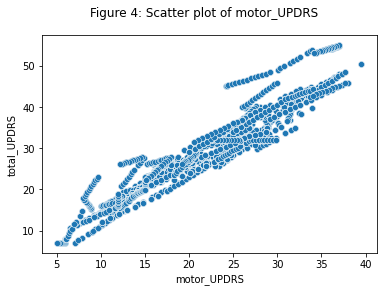

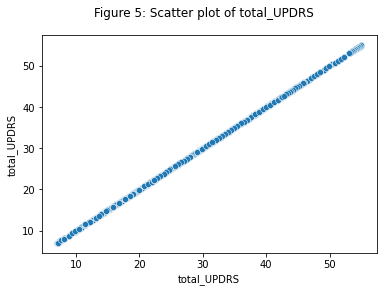

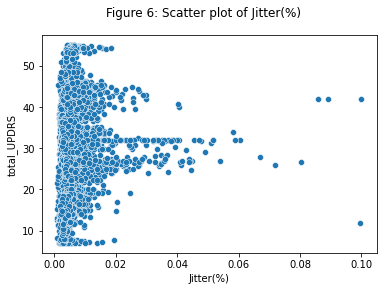

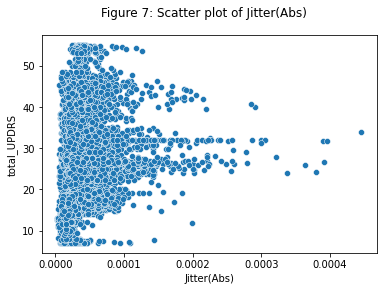

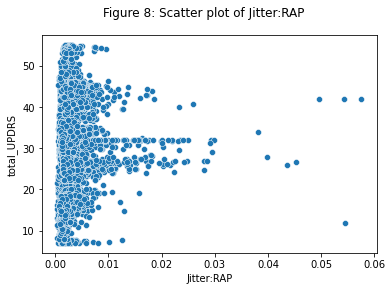

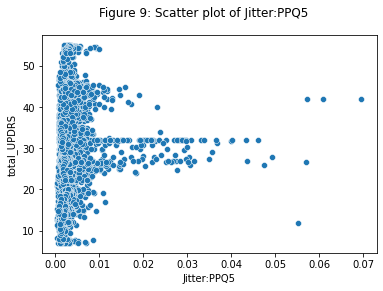

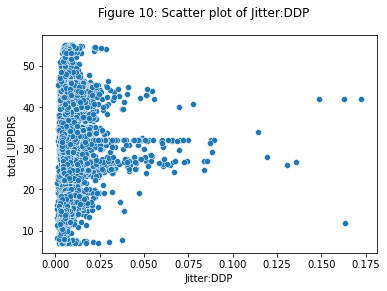

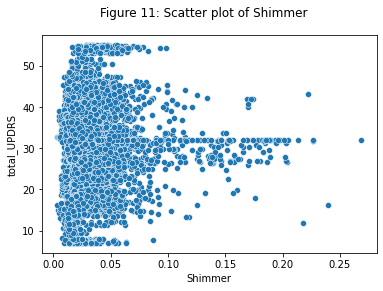

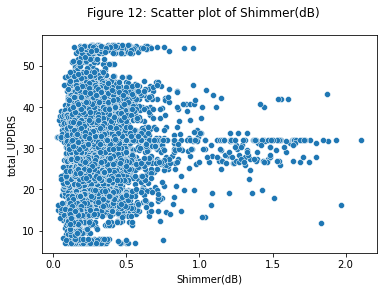

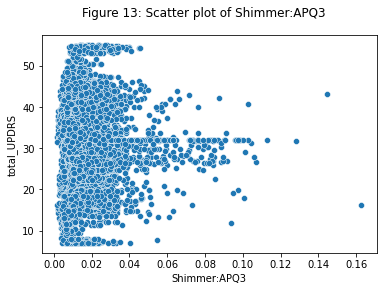

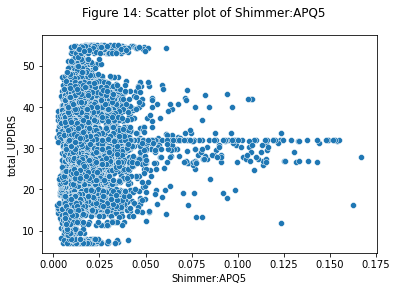

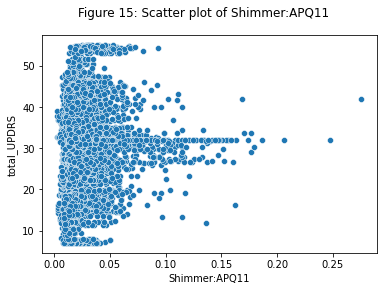

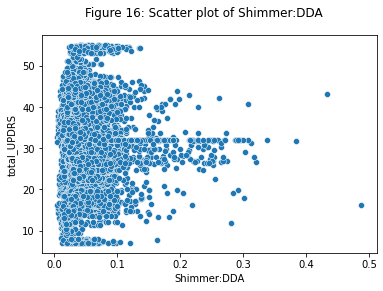

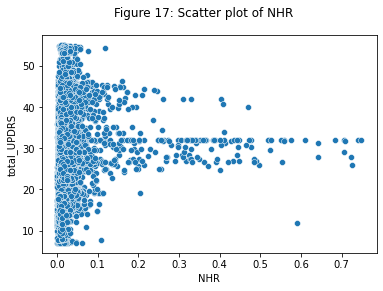

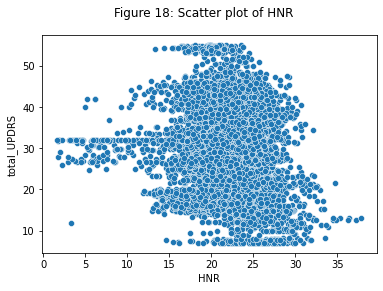

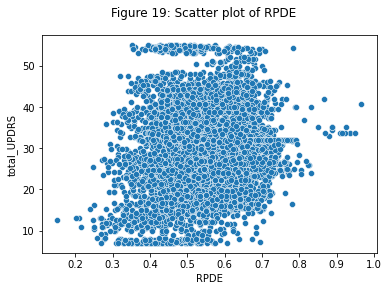

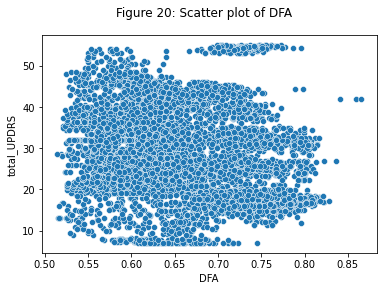

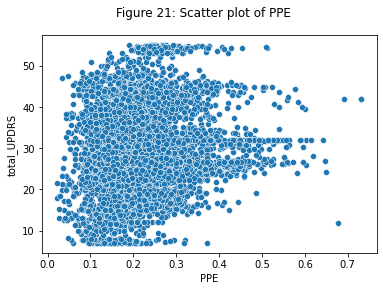

In [148]:

df = data.copy()

def BarPlot(x):
    total = float(len(df)) 
    ax = df[x].value_counts(normalize = True).plot(
        kind = "bar", alpha = 0.5)

def BoxHistogramPlot(x):
    figure, (ax_hist) = plt.subplots(1, sharex=True, 
                                        )
    plt.suptitle("Figure " + str(i) + ": Scatter plot of " + col,size=12)
    sns.scatterplot(data= data , x= x , y="total_UPDRS")


    #sns.despine(ax=ax_hist)
    plt.show()

i= 1   
for col in list(data.columns[1:]):
    BoxHistogramPlot(df[col])
    plt.show()
    i = 1 + i


In [170]:
#Fitting the model with skitlearn 


X_ini = df.drop(['subject#','motor_UPDRS', 'total_UPDRS'], axis = 1)

y_ini = df['total_UPDRS']




In [171]:
X = X_ini.values
y = y_ini.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

assert X_train.shape[0] == y_train.shape[0], 'Incorrect dimensions'
assert X_test.shape[0] == y_test.shape[0], 'Incorrect dimensions' 
assert X_train.shape[1] == X_test.shape[1], 'Incorrect dimensions' 


In [172]:
print('X_train set shape:', X_train.shape)
print('X_test set shape:', X_test.shape)
print('y_train set shape:', y_train.shape)
print('y_test set shape:', y_test.shape)

X_train set shape: (3928, 19)
X_test set shape: (1935, 19)
y_train set shape: (3928,)
y_test set shape: (1935,)


MSE: -----> 7.32605709769552
RMSE: ----> 2.7066690040888854
R2:  -----> 0.9371682830989365


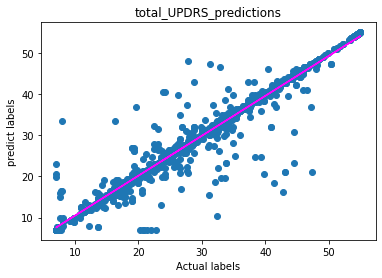

In [173]:
#decision Tree regression

DTR = DecisionTreeRegressor()
model = DTR.fit(X_train, y_train)

predictions = model.predict(X_test)
np.set_printoptions(suppress = True)

plt.scatter(y_test, predictions)
plt.xlabel("Actual labels")
plt.ylabel("predict labels")
plt.title("total_UPDRS_predictions")

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "magenta");

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MSE: -----> {mse}")
print(f"RMSE: ----> {rmse}")
print(f"R2:  -----> {r2}")

MSE: -----> 3.203357388016567
RMSE: ----> 1.789792554464502
R2:  -----> 0.9725264979711803


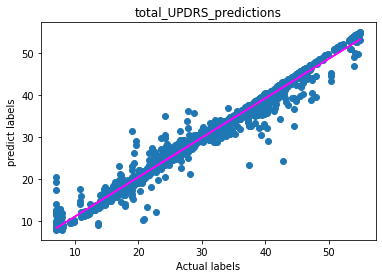

In [174]:
#Random forest regression

RF = RandomForestRegressor()
model = RF.fit(X_train, y_train)

predictions = model.predict(X_test)
np.set_printoptions(suppress = True)

plt.scatter(y_test, predictions)
plt.xlabel("Actual labels")
plt.ylabel("predict labels")
plt.title("total_UPDRS_predictions")

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "magenta");

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MSE: -----> {mse}")
print(f"RMSE: ----> {rmse}")
print(f"R2:  -----> {r2}")